In [34]:
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

33351.807722316 1101.3843824658609


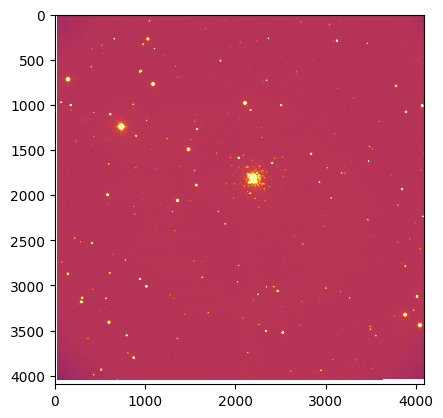

In [31]:
loc = '/Users/research/Desktop/KingClusters/Clusters/NGC4147'
save_dir = f'{loc}/stacked'
os.makedirs(save_dir, exist_ok=True)
NGC4147_locs = glob.glob(f'{loc}/aligned/*.fts')
fname = loc.split('/')[-1]
NGC4147_data = [fits.getdata(i) for i in NGC4147_locs]
header = fits.getheader(NGC4147_locs[0])
NGC4147_stacked = np.sum(NGC4147_data, axis=0)
mean, std = np.nanmean(NGC4147_stacked), np.nanstd(NGC4147_stacked)
print(mean, std)
plt.imshow(NGC4147_stacked, vmin=mean-std, vmax=mean+std, cmap='inferno')
plt.show()
fits.writeto(f'{save_dir}/{fname}_stacked.fts', NGC4147_stacked, header, overwrite=True)  # not background subtracted
# There is an offset, need to realign images

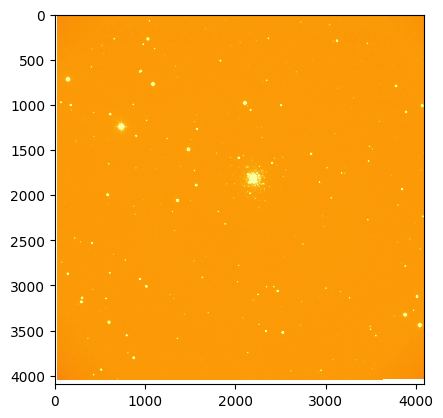

In [47]:
vmax = np.nanmean((NGC4147_stacked - mean)) + np.nanstd((NGC4147_stacked - mean))
vmin = np.nanmin((NGC4147_stacked - mean)) - np.nanstd((NGC4147_stacked - mean))
plt.imshow(NGC4147_stacked - mean, vmin=vmin, vmax =vmax, cmap='inferno')
plt.show()

In [44]:
np.nanmax((NGC4147_stacked - mean).flatten())
np.nanmin((NGC4147_stacked - mean).flatten())

-2816.408756870729